In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def generate_compact_dataset():
    # Set the mean for normal groups (same for all normal groups)
    np.random.seed(4) 
    mean_normal = np.array([0, 0])

    base_cov_normal =  [[1.1, 1], [1, 1.1]]
    normal_cov = [[1.1,0], [0,1.1]]

    angle_rad = np.radians(60)

    # Create the rotation matrix for 2D
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad), np.cos(angle_rad)]])

    # Set the mean for outlier groups (far from the normal groups)
    mean_outlier = np.array([5, 10])

    # Covariance matrix for outliers (wider spread)
    cov_matrix_rot = rotation_matrix @ base_cov_normal @ rotation_matrix.T

    # Generate 18 normal groups with different variances
    normal_groups = []
    for i in range(49):
        data_normal = np.random.multivariate_normal(mean_normal, normal_cov, 40)
        normal_groups.append((data_normal))

    outlier_group_1 = np.random.multivariate_normal(mean_normal, base_cov_normal, 40)
    # outlier_group_2 = np.random.multivariate_normal(mean_normal, base_cov_normal, 40)

    # Combine all groups
    all_groups = normal_groups + [(outlier_group_1)]

    return all_groups

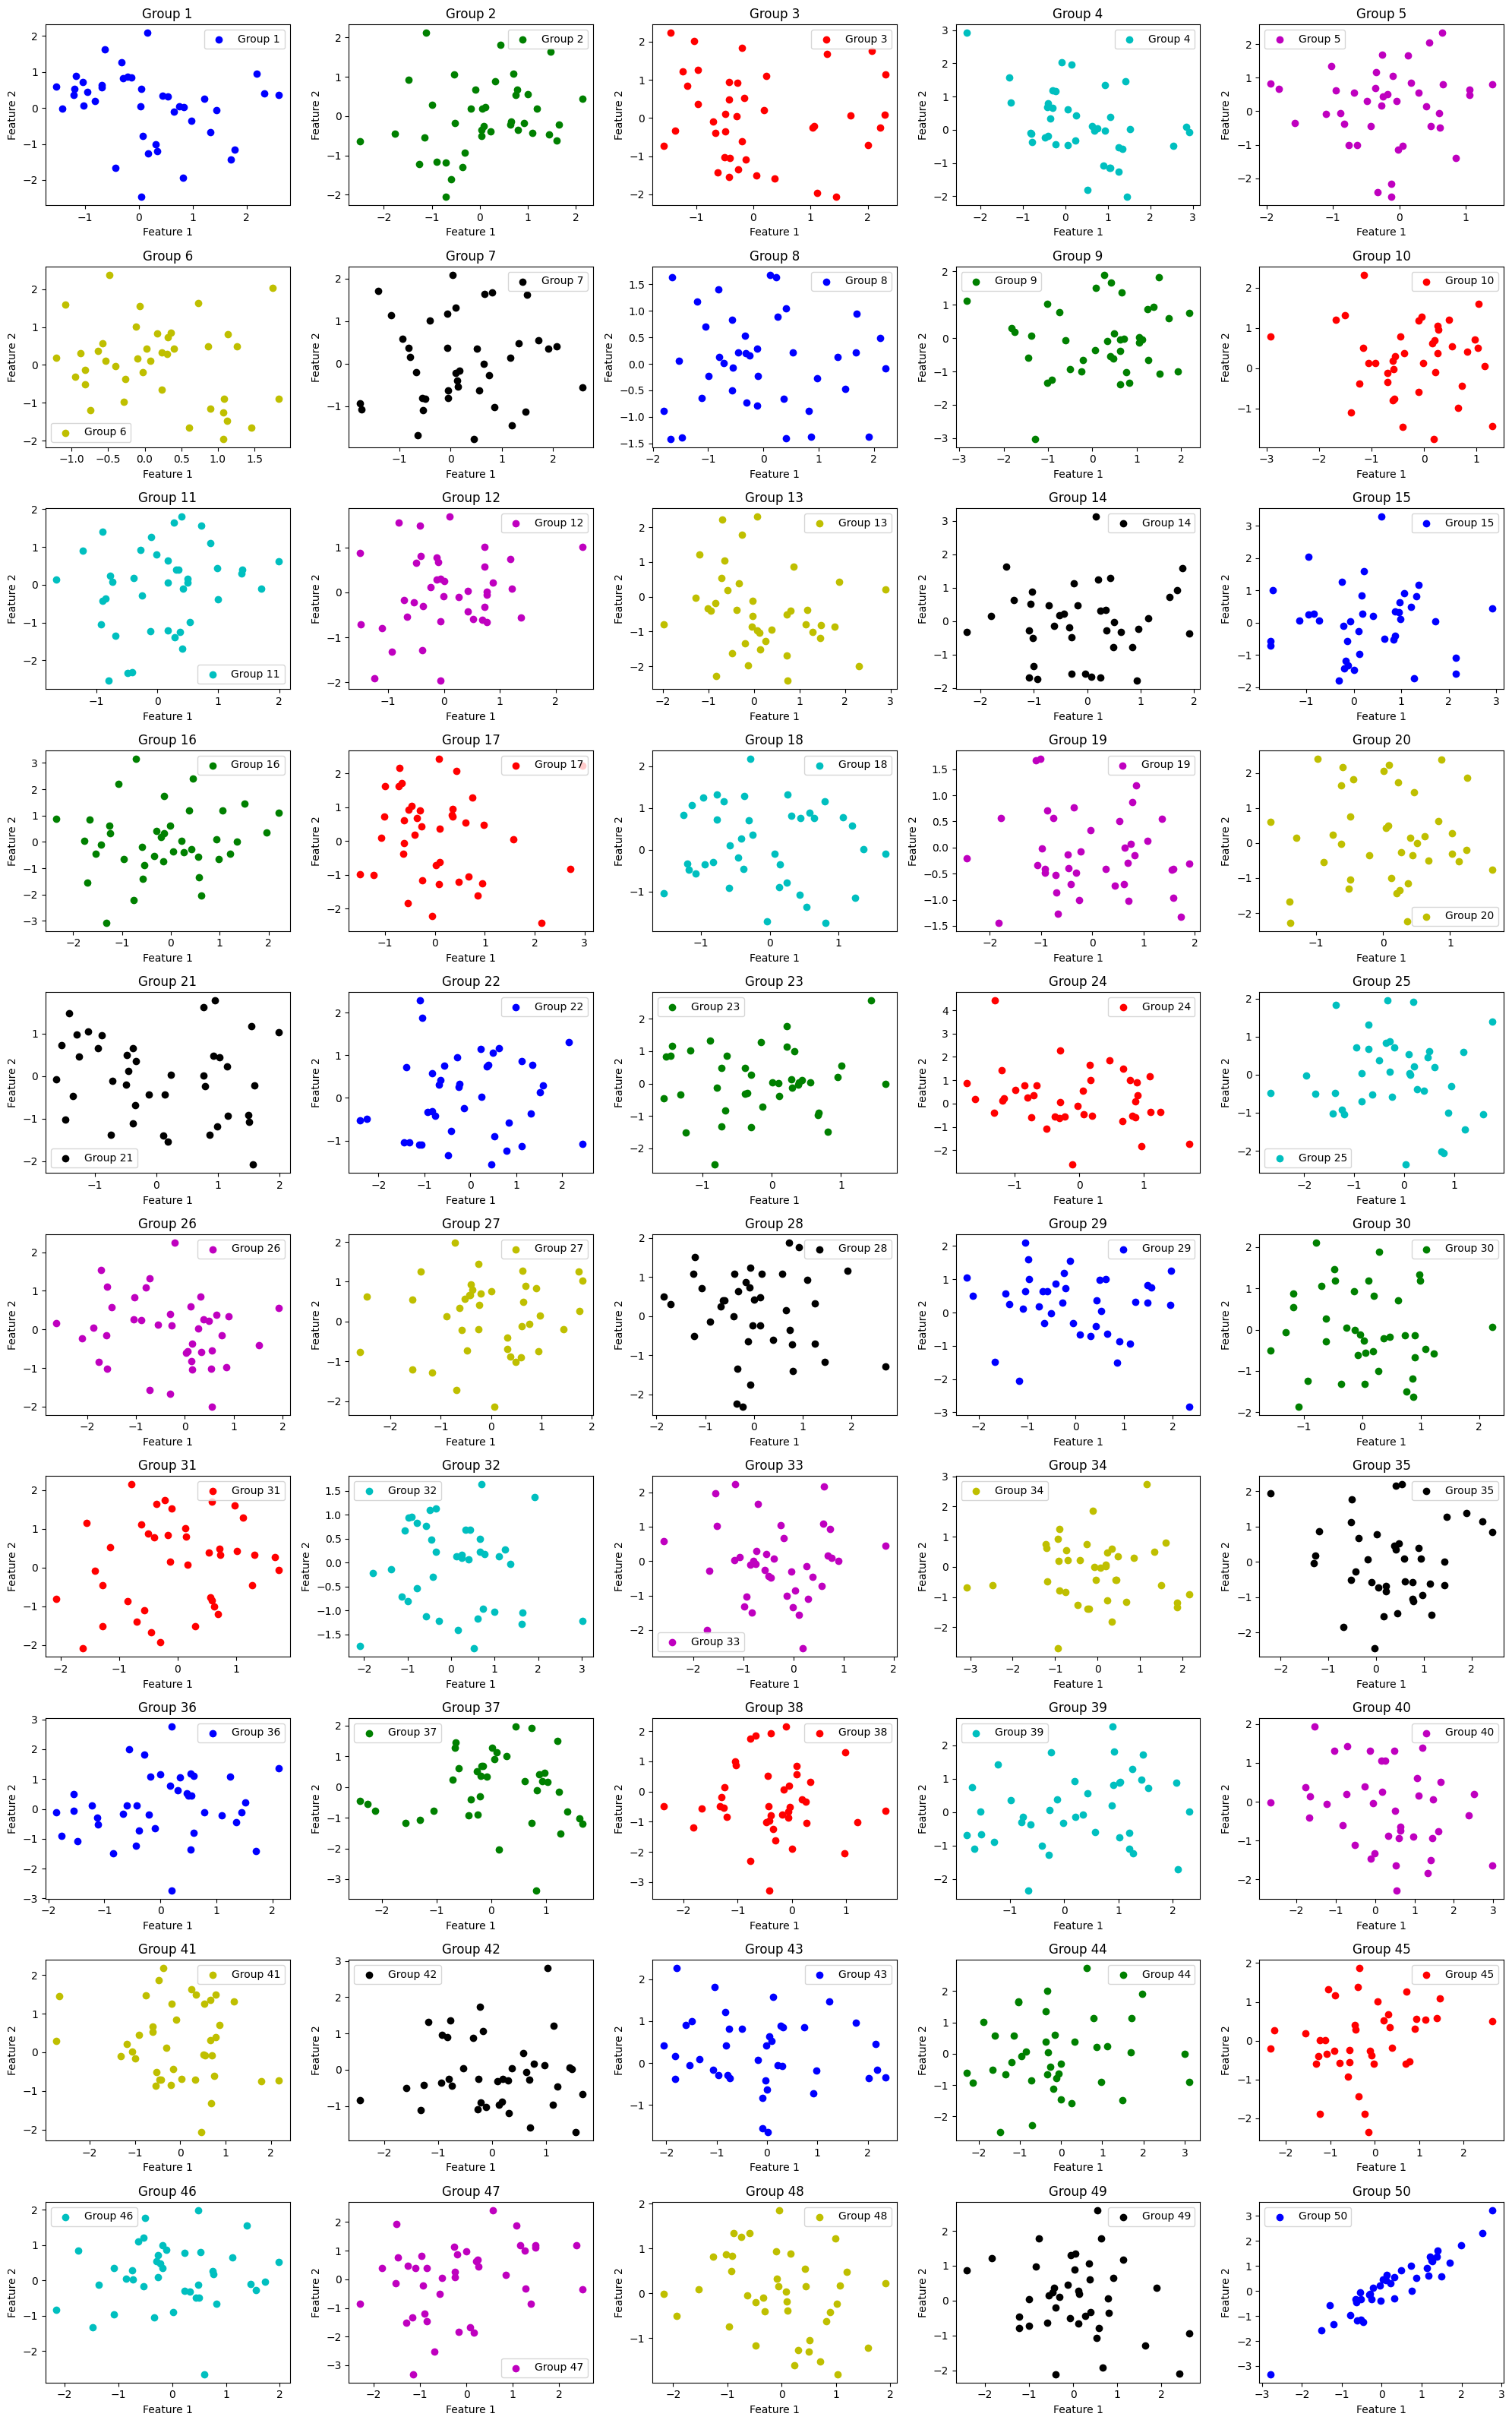

In [3]:
def plot_all_groups_subplots(groups):
    # Create a figure with 8 rows and 5 columns (to fit 40 subplots)
    fig, axes = plt.subplots(10, 5, figsize=(20, 32))  # Adjust figure size for clarity

    # Flatten axes array to easily index it
    axes = axes.flatten()

    # Different colors for each group
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] * 16  # Repeat colors for 40 groups

    for idx, (group, ax) in enumerate(zip(groups, axes)):
        ax.scatter(group[:, 0], group[:, 1], color=colors[idx], label=f"Group {idx + 1}")
        ax.set_title(f"Group {idx + 1}")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.legend()

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.savefig("dataset.pdf")  # Save figure before showing
    plt.show()  # Display the plots

# Generate the dataset
datasets = generate_compact_dataset()

# Plot all groups on different subplots
plot_all_groups_subplots(datasets)

In [4]:
datasets

[array([[ 0.05302957,  0.52435338],
        [-1.0445181 ,  0.72745225],
        [-0.43871834, -1.66191862],
        [-0.67932059,  0.62779094],
        [ 0.34846677, -1.20348365],
        [ 0.64886624, -0.09228147],
        [ 0.44581969,  0.34847004],
        [-1.21327913,  0.36812892],
        [-0.63650875,  1.62248561],
        [ 0.75864708,  0.04838739],
        [-1.03097034,  0.05708954],
        [ 0.16769713, -1.26795553],
        [ 2.33187987,  0.41354031],
        [ 1.77495975, -1.16712723],
        [ 1.7155865 , -1.42739275],
        [-0.68301142,  0.56892773],
        [ 0.05034938, -2.47316849],
        [-1.15954633,  0.87873018],
        [ 2.18977744,  0.95949329],
        [-0.28968452,  0.83538873],
        [-1.19962606,  0.53480838],
        [-1.41322828, -0.00981696],
        [-0.13708418,  0.84123554],
        [-0.31775129,  1.26067095],
        [-0.20634819,  0.8773587 ],
        [ 0.82499543, -1.9307269 ],
        [ 0.03938014,  0.03768166],
        [-0.81674932,  0.188

In [5]:
from src.ocsmm.new_OCSMMClassifier import OneClassSMMClassifier

classifier = OneClassSMMClassifier(nu=0.12, n_jobs=8).fit(datasets)
# classifier.fit(datasets)

In [6]:
classifier.train_kappa[49]

array([0.0382975 , 0.10163572, 0.03313088, 0.00323344, 0.07331228,
       0.01403605, 0.08574768, 0.12674352, 0.44156411, 0.0219509 ,
       0.152435  , 0.13558719, 0.10714961, 0.08424316, 0.04478629,
       0.45914786, 0.05181963, 0.04171836, 0.1210281 , 0.28509352,
       0.03834093, 0.07000543, 0.17612706, 0.02920521, 0.06822596,
       0.04933924, 0.10633199, 0.06516878, 0.12643653, 0.09920605,
       0.27042206, 0.31093854, 0.25915258, 0.18228652, 0.05538726,
       0.07047115, 0.04722754, 0.1604873 , 0.11835739, 0.0270117 ,
       0.01214341, 0.09852188, 0.01923383, 0.36525165, 0.1058687 ,
       0.09039357, 0.38989972, 0.02852014, 0.04015483, 1.        ])

In [7]:
y_pred, decision = classifier.predict(datasets)

In [8]:
decision

array([ 0.06607211,  0.04039876,  0.05112379,  0.        ,  0.06555641,
        0.00620344,  0.03818148,  0.01860338,  0.02973285,  0.00620344,
        0.03939544,  0.03987855,  0.0799123 ,  0.06459554,  0.05558847,
        0.02234472,  0.04720291,  0.02657606,  0.02994261,  0.04647402,
        0.04679699,  0.00692152,  0.07126389,  0.00620345,  0.04773573,
        0.03408361,  0.02410566,  0.07205279,  0.00620389,  0.04830391,
        0.03528208,  0.0062035 ,  0.09554432,  0.00620345,  0.08724101,
        0.09189132,  0.00620344,  0.0445848 ,  0.07501586,  0.05436474,
        0.00620346,  0.00620356,  0.02800383,  0.06344174,  0.08374172,
        0.08407813,  0.00620338,  0.04175737,  0.080777  , -0.10268004])

In [9]:
y_pred

array([ 1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1])

In [10]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[49]

In [11]:
decision

array([ 0.06607211,  0.04039876,  0.05112379,  0.        ,  0.06555641,
        0.00620344,  0.03818148,  0.01860338,  0.02973285,  0.00620344,
        0.03939544,  0.03987855,  0.0799123 ,  0.06459554,  0.05558847,
        0.02234472,  0.04720291,  0.02657606,  0.02994261,  0.04647402,
        0.04679699,  0.00692152,  0.07126389,  0.00620345,  0.04773573,
        0.03408361,  0.02410566,  0.07205279,  0.00620389,  0.04830391,
        0.03528208,  0.0062035 ,  0.09554432,  0.00620345,  0.08724101,
        0.09189132,  0.00620344,  0.0445848 ,  0.07501586,  0.05436474,
        0.00620346,  0.00620356,  0.02800383,  0.06344174,  0.08374172,
        0.08407813,  0.00620338,  0.04175737,  0.080777  , -0.10268004])

In [12]:
import torch

In [13]:
datasets_tensor = [torch.from_numpy(group).float() for group in datasets]

In [14]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**datasets[0].shape[1])

Calculating projections:   0%|          | 0/3 [00:00<?, ?it/s]

Calculating projections: 100%|██████████| 3/3 [00:00<00:00, 60.36it/s]


In [15]:
ocsmm_shap.return_deterministic_shapley_values()

tensor([[ 2.2999e-02,  1.2755e-02,  2.2341e-02,  2.3824e-04,  3.3846e-02,
          7.4730e-03,  2.7910e-02,  3.2328e-02,  3.7541e-03, -4.1269e-03,
          1.7975e-02,  2.6257e-02,  2.5340e-02,  3.2427e-02,  3.3669e-02,
          2.4055e-02,  1.6445e-02,  2.3879e-02,  1.9020e-02,  2.5694e-02,
          2.6925e-02,  2.3327e-02,  2.6787e-02,  2.4353e-02,  1.5941e-03,
          2.0270e-02, -2.0201e-06,  2.8696e-02,  1.1942e-03,  2.6961e-02,
          2.7953e-02,  1.4616e-02,  1.8911e-02, -3.2884e-02,  2.9148e-02,
          4.6629e-02,  3.7168e-02,  4.4212e-02,  3.2499e-02,  1.0460e-02,
         -1.0667e-03,  9.1024e-03,  4.1517e-02,  1.6774e-02,  2.3932e-02,
          2.9895e-02,  3.0326e-02,  2.4802e-02,  2.6528e-02, -3.7835e-02],
        [ 4.4277e-02,  2.1947e-02,  2.9655e-02, -3.4917e-04,  5.0343e-02,
          9.0335e-03,  7.8640e-03,  1.7285e-03,  2.2176e-02,  8.3996e-03,
          4.8665e-02,  2.4313e-02,  5.6105e-02,  2.9441e-02,  1.6514e-02,
          1.5243e-03,  3.3551e-02,  8

In [16]:
ocsmm_shap.return_shap_interactions()

X2 shape: torch.Size([2, 2])
residuals shape: torch.Size([4, 50])
second_order_weights shape: torch.Size([2, 1, 1])


RuntimeError: Expected size for first two dimensions of batch2 tensor to be: [2, 2] but got: [2, 4].

In [22]:
phi2.max()

tensor(4.3118e-05)

In [16]:
phi1, phi2 = ocsmm_shap.phi_1, ocsmm_shap.phi_2         # (n,50)  and  (1,50)

ratio = (phi2.abs() / phi1.abs().sum(0)).squeeze()    # shape (50,)
print("mean ratio normal :", ratio[:49].mean().item())
print("ratio outlier     :", ratio[49].item())

mean ratio normal : 0.029456302523612976
ratio outlier     : 0.03390532732009888


In [17]:
phi2.max()

tensor(0.0048)

In [ ]:
from src.utils.visualisation.interaction_plotting import plot_local_interaction_network
plot_local_interaction_network(phi1.T[49], )

In [19]:
from src.utils.visualisation.deterministic_values import global_bar_plot_ocsmm, local_bar_plot_ocsmm, summary_plot_ocsmm
# shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [13]:
feature_names=['x', 'y']

In [14]:
shapley_values[0]

tensor([ 0.0153,  0.0063,  0.0137,  0.0142,  0.0095,  0.0048,  0.0186,  0.0129,
         0.0018,  0.0075,  0.0118,  0.0098,  0.0071,  0.0133,  0.0125,  0.0090,
         0.0054,  0.0135,  0.0141,  0.0100,  0.0100,  0.0077,  0.0159,  0.0109,
         0.0048,  0.0136,  0.0037,  0.0024,  0.0154,  0.0046,  0.0105,  0.0105,
         0.0060,  0.0099,  0.0056,  0.0137,  0.0047,  0.0111,  0.0059,  0.0136,
         0.0039,  0.0115,  0.0020,  0.0056,  0.0121,  0.0134,  0.0133,  0.0034,
         0.0081, -0.0360])

In [15]:
sum_of_shaps_per_group = shapley_values[0].sum(dim=0)
sum_of_shaps_per_group

tensor(0.4292)

In [17]:
intercations = ocsmm_shap.compute_interaction_values()

In [18]:
intercations

(tensor([[-6.5118e-06],
         [-2.8731e-06],
         [-3.3285e-06],
         [-6.0964e-06],
         [-4.2096e-06],
         [-2.4308e-06],
         [-6.4783e-06],
         [-5.6960e-06],
         [-9.8860e-07],
         [-1.9092e-06],
         [-3.8389e-06],
         [-5.4464e-06],
         [-4.1109e-06],
         [-5.3663e-06],
         [-4.6957e-06],
         [-2.5257e-06],
         [-3.5372e-06],
         [-4.3418e-06],
         [-6.3218e-06],
         [-4.7460e-06],
         [-4.1164e-06],
         [-2.5257e-06],
         [-4.8690e-06],
         [-3.0193e-06],
         [-1.5339e-06],
         [-6.0294e-06],
         [-2.3991e-06],
         [-2.1458e-06],
         [-6.5230e-06],
         [-4.4294e-06],
         [-2.4177e-06],
         [-2.0638e-06],
         [-5.0664e-06],
         [-2.3637e-06],
         [-1.4678e-06],
         [-2.9132e-06],
         [-2.8852e-06],
         [-5.2117e-06],
         [-3.3230e-06],
         [-1.4622e-06],
         [-1.3355e-06],
         [-4.820

In [30]:
base, phi1, phi2_list = ocsmm_shap.compute_interaction_shapley_values_concise()

AttributeError: 'OCSMMSHAP' object has no attribute 'compute_interaction_shapley_values_concise'

In [19]:
base

tensor([0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171,
        0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171,
        0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171,
        0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171,
        0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171,
        0.0171, 0.0171, 0.0171, 0.0171, 0.0171])

In [20]:
phi1

tensor([[ 0.0061, -0.0014,  0.0033,  0.0067,  0.0016, -0.0055,  0.0088,  0.0054,
         -0.0069,  0.0007,  0.0046,  0.0008, -0.0003,  0.0053,  0.0043, -0.0005,
         -0.0032,  0.0055,  0.0039,  0.0029,  0.0025, -0.0010,  0.0052,  0.0027,
         -0.0070,  0.0065, -0.0050, -0.0054,  0.0082, -0.0042,  0.0025,  0.0038,
         -0.0032, -0.0004, -0.0007,  0.0055, -0.0033,  0.0031, -0.0049,  0.0052,
         -0.0069,  0.0049, -0.0078, -0.0050,  0.0010,  0.0068,  0.0044, -0.0033,
          0.0006, -0.0451],
        [ 0.0050,  0.0016, -0.0041,  0.0064, -0.0091, -0.0069,  0.0006,  0.0033,
         -0.0037, -0.0005, -0.0011,  0.0080,  0.0012, -0.0001,  0.0037, -0.0024,
          0.0026, -0.0006,  0.0036,  0.0005, -0.0025,  0.0013, -0.0051,  0.0032,
         -0.0006,  0.0090,  0.0064, -0.0003,  0.0053,  0.0009, -0.0012,  0.0046,
         -0.0002, -0.0057,  0.0062, -0.0009, -0.0061,  0.0009,  0.0050, -0.0077,
          0.0036,  0.0065, -0.0018,  0.0090, -0.0040,  0.0021,  0.0026, -0.0008,


In [32]:
diff = decision[49]-base[49]-phi1[0][49]-phi1[1][49]
diff

tensor(-0.0011)

In [27]:
base

tensor([0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171,
        0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171,
        0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171,
        0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171,
        0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171, 0.0171,
        0.0171, 0.0171, 0.0171, 0.0171, 0.0171])

In [28]:
import torch
phi2=off_diagonal_tensor = torch.stack([tensor[0, 1] for tensor in phi2_list if tensor.shape == (2, 2)])
phi2

tensor([-2.3833e-06,  1.8794e-06,  7.9954e-07, -2.0619e-06,  2.3702e-07,
         1.2489e-06, -3.1125e-06, -1.3048e-06,  3.4506e-06,  2.2922e-06,
         1.0733e-06, -8.8196e-07,  7.7341e-07, -7.0268e-07, -1.2498e-06,
         1.7816e-06,  7.9907e-07, -7.0874e-07, -3.0501e-06, -1.6950e-06,
        -3.1828e-07,  1.4018e-06, -1.6675e-06,  2.2762e-06,  2.2883e-06,
        -1.2806e-06,  1.0296e-06,  2.1351e-06, -1.5702e-06, -1.8906e-07,
         1.9589e-06,  3.1162e-06, -2.8638e-08,  1.1073e-06,  3.5227e-06,
         1.0384e-06,  6.1002e-07, -1.3467e-06,  9.8720e-07,  2.8266e-06,
         2.8424e-06,  2.3004e-07,  2.0303e-07, -2.1183e-06, -4.0671e-06,
        -1.1967e-06, -1.0133e-06,  2.9365e-06,  3.5448e-06, -1.6846e-05])

In [31]:
diff - phi2[49]

tensor(-0.0010)

In [54]:
max_index, max_tensor = max(enumerate(phi2_list), key=lambda item: item[1][0, 1].item())
max_val = max_tensor[0, 1].item() # Extract value from the found tensor

# Find the item (index, tensor) with the minimum off-diagonal value
min_index, min_tensor = min(enumerate(phi2_list), key=lambda item: item[1][0, 1].item())
min_val = min_tensor[0, 1].item() # Extract value from the found tensor

print(f"Max off-diagonal: {max_val:.6f} at index: {max_index}")
print(f"Min off-diagonal: {min_val:.6f} at index: {min_index}")

Max off-diagonal: 0.000004 at index: 48
Min off-diagonal: -0.000017 at index: 49


In [24]:
phi2_list[49][0][1] + (sum_of_shaps_per_group+base)[49]

tensor(-0.0262)

In [21]:
summary_plot_ocsmm(shapley_values=shapley_values.T.numpy(), feature_names=feature_names, datasets=datasets)
# cannot add contor coloring withut features parameter-> but i have groups and not sample level

AttributeError: 'tuple' object has no attribute 'T'

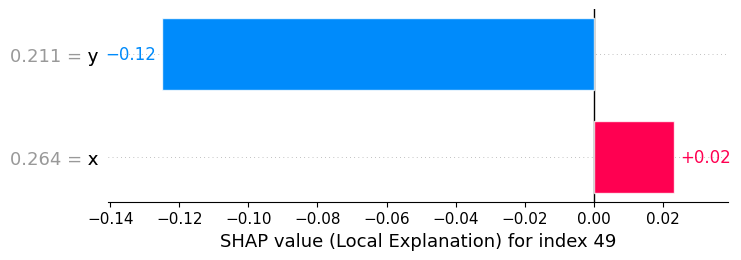

In [22]:

local_bar_plot_ocsmm(phi1.T.numpy(), 49, feature_names=['x', 'y'], datasets=datasets)

Group 17 has tilted covariance and no shift in the mean, the prediction is an outlier because of the interaction of both the x and y values and none of them is dominant.

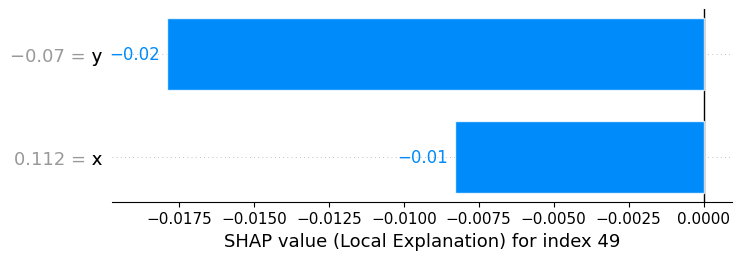

In [ ]:
local_bar_plot_ocsmm(shapley_values.T.numpy(), 49, feature_names=['x', 'y'], datasets=datasets)

 Group 18 has its mean moved by 5 points to the right on the x axis. The prediction of this point being an outleir is mainly because of the shift in the x axix. This is shown by the high shapley value for the feature x


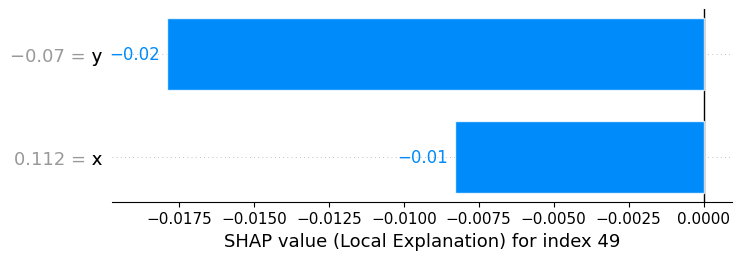

In [ ]:
local_bar_plot_ocsmm(shapley_values.T.numpy(), 49, feature_names=['x', 'y'], datasets=datasets)

Group 20 (index 19) is not only rotated by 90 degrees it also has its mean shifted by 5 points in the x direction. This shift is contributing more than the tilt which is contributing equally for both features.  So, the feature x is identified as the most influential featrue. 

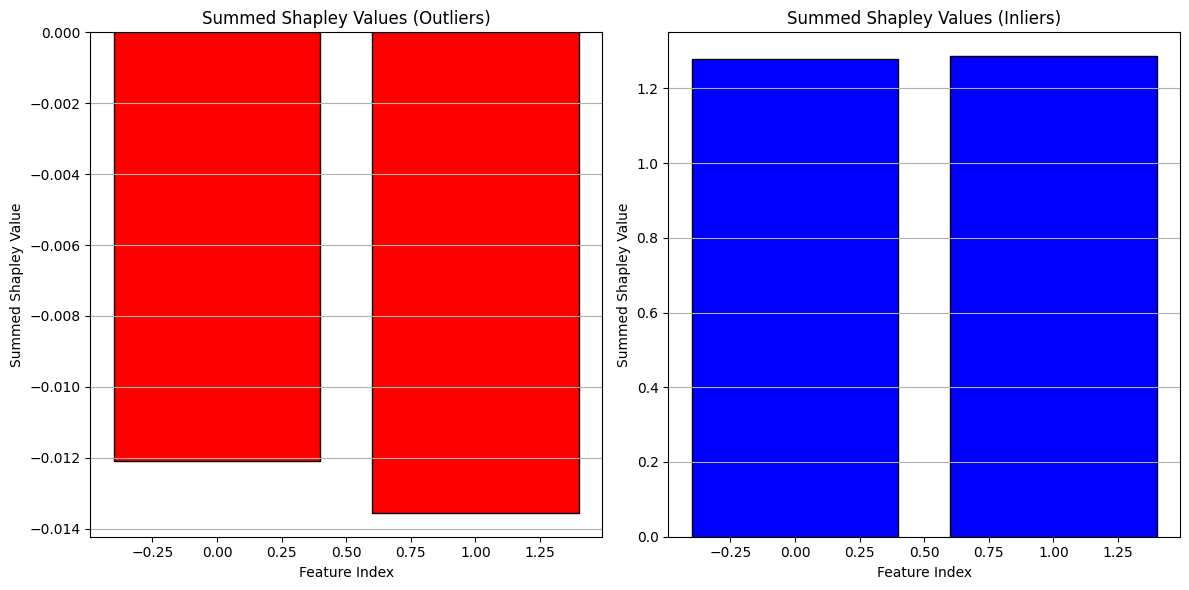

In [ ]:
inlier_indices = [i for i in range(shapley_values.shape[1]) if i not in outlier_indices]

summed_outlier_shapley = shapley_values[:, outlier_indices].sum(dim=1).numpy()
summed_inlier_shapley = shapley_values[:, inlier_indices].sum(dim=1).numpy()

# Plot histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Outlier Shapley Values
ax[0].bar(range(len(summed_outlier_shapley)), summed_outlier_shapley, color='red', edgecolor='black')
ax[0].set_title('Summed Shapley Values (Outliers)')
ax[0].set_xlabel('Feature Index')
ax[0].set_ylabel('Summed Shapley Value')
ax[0].grid(True, axis='y')

# Inlier Shapley Values
ax[1].bar(range(len(summed_inlier_shapley)), summed_inlier_shapley, color='blue', edgecolor='black')
ax[1].set_title('Summed Shapley Values (Inliers)')
ax[1].set_xlabel('Feature Index')
ax[1].set_ylabel('Summed Shapley Value')
ax[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

The outliers are moving the decision towards the negative direction, hence their influence is negative. The shifting of the mean is on the x axis and hence feature x has higher contribution

In [ ]:
# global importance measure
mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)  

# Call bar_plot for global explanation
global_bar_plot(mean_abs_shap_values, feature_names=['x', 'y'])

/tmp/ipykernel_28847/2067785604.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)


NameError: name 'global_bar_plot' is not defined

Accumulated SHAP values for all outliers ( Mean SHAP among outliers )

In [ ]:
selected_shap_values = shapley_values[:,outlier_indices]
mean_abs_shap_values_outlier_group = np.abs(selected_shap_values).mean(axis=1) 
global_bar_plot(mean_abs_shap_values_outlier_group, feature_names=['x', 'y'])

/tmp/ipykernel_16836/2829898207.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values_outlier_group = np.abs(selected_shap_values).mean(axis=1)


NameError: name 'global_bar_plot' is not defined

In [ ]:
from src.utils.visualisation.interaction_plotting import plot_local_interaction_network

In [ ]:
interactions = ocsmm_shap.compute_interaction_shapley_values_concise()

In [ ]:
interactions = interactions #*100

In [ ]:
interactions

[tensor([[ 0.0000e+00, -1.6976e-05],
         [-1.6976e-05,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.5382e-05],
         [-1.5382e-05,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.3046e-05],
         [-1.3046e-05,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -7.4133e-06],
         [-7.4133e-06,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.1016e-05],
         [-1.1016e-05,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.0096e-05],
         [-1.0096e-05,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.2163e-05],
         [-1.2163e-05,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.5363e-05],
         [-1.5363e-05,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -8.3847e-06],
         [-8.3847e-06,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.3128e-05],
         [-1.3128e-05,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.1906e-05],
         [-1.1906e-05,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.0453e-05],
         [-1.0453e-05,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.1839e-05],
         [-1.1839e-05,  0.0000e+00]]),
 tensor([[ 0

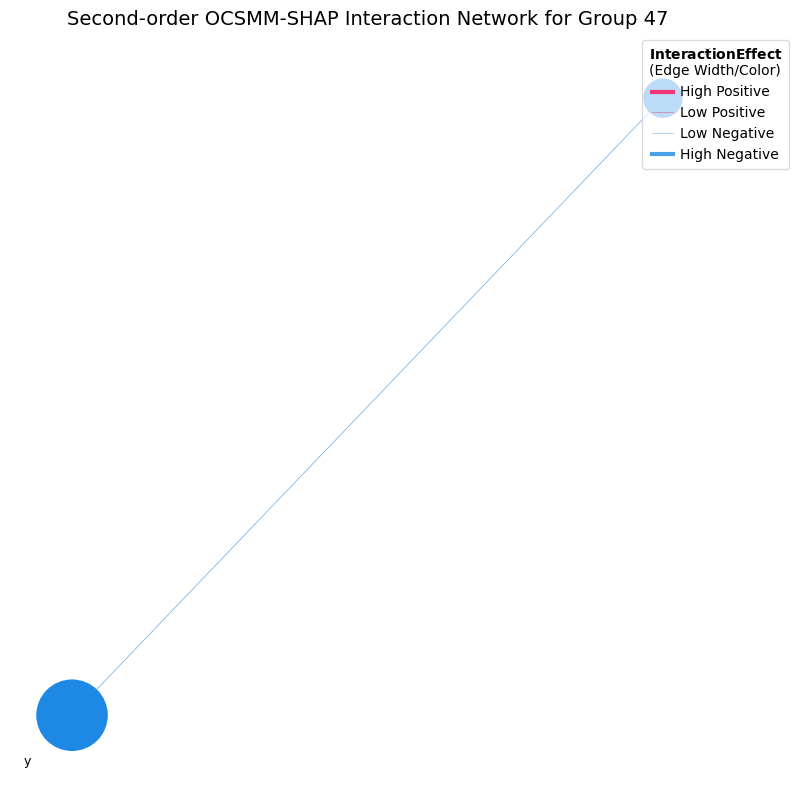

In [ ]:
plot_local_interaction_network(
        phi_1_group=shapley_values.T[49],
        interaction_matrix_group=interactions[49],
        feature_names=feature_names,
        group_id="47"
    )

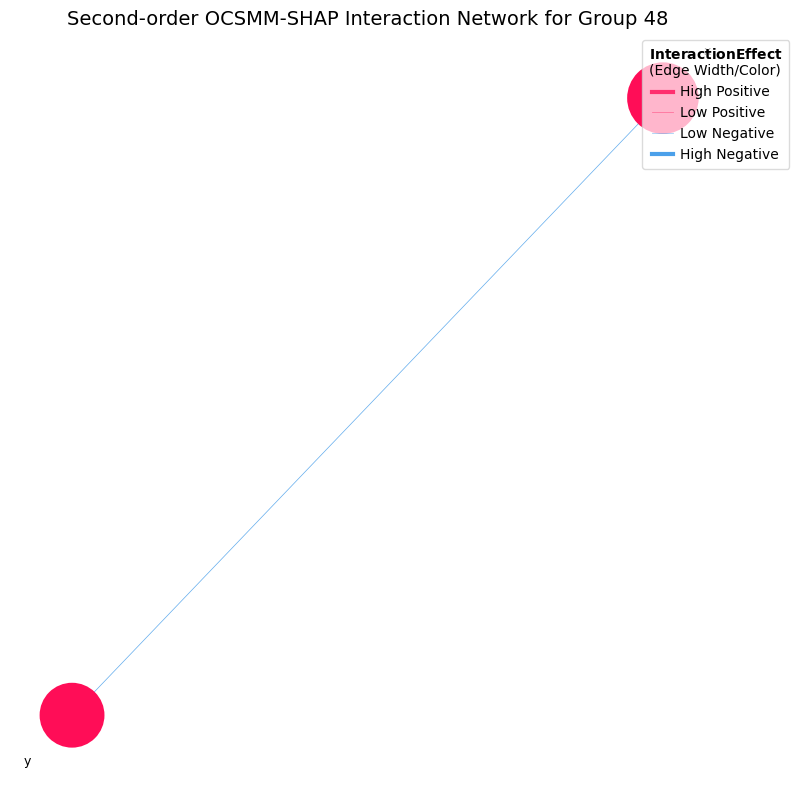

In [ ]:
plot_local_interaction_network(
        phi_1_group=shapley_values.T[48],
        interaction_matrix_group=interactions[48],
        feature_names=feature_names,
        group_id="48"
    )

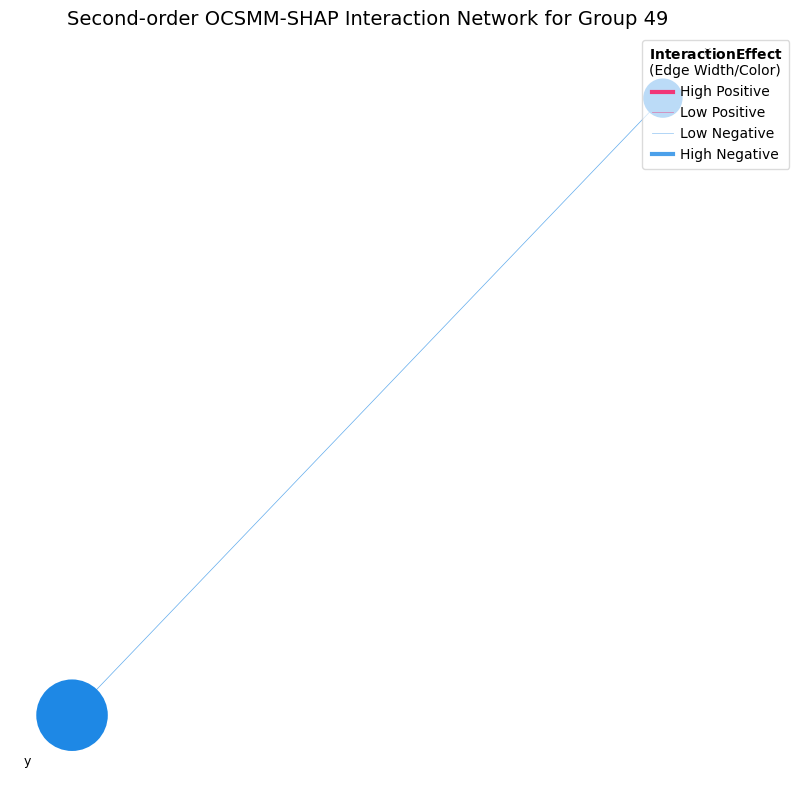

In [ ]:
plot_local_interaction_network(
        phi_1_group=shapley_values.T[49],
        interaction_matrix_group=interactions[49],
        feature_names=feature_names,
        group_id="49"
    )

In [ ]:
type(classifier)

src.ocsmm.new_OCSMMClassifier.OneClassSMMClassifier

In [ ]:
from src.explanation_algorithms.OCSMM_interaction import OCSMMSHAP
ocsmm_exp = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)

NameError: name 'datasets' is not defined

In [ ]:
ocsmm_exp.fit(datasets, 2**datasets[0].shape[1])

UnboundLocalError: cannot access local variable 's' where it is not associated with a value

In [ ]:
shapley_dict = ocsmm_exp.compute_shapley_values_dict_adjusted_target(datasets)

AttributeError: 'OCSMMSHAP' object has no attribute 'compute_shapley_values_dict_adjusted_target'

In [ ]:
decision[45]

np.float64(-0.03112111062243983)

In [ ]:
shapley_dict[45]

{(): 0.05059479549527168,
 (0,): 0.0016174246557056904,
 (1,): -0.0833333283662796,
 (0, 1): 0.0}

In [ ]:
decision[49]

np.float64(-0.026305028384010054)

In [ ]:
shapley_dict[49]

{(): 0.05059479549527168,
 (0,): -0.035233158618211746,
 (1,): -0.0416666641831398,
 (0, 1): 0.0}

In [ ]:
shapley_dict

[{(): 0.05059479549527168,
  (0,): 0.0005421480163931847,
  (1,): 0.01041666604578495,
  (0, 1): 0.0},
 {(): 0.05059479549527168,
  (0,): 0.004758255556225777,
  (1,): 0.01041666604578495,
  (0, 1): 0.0},
 {(): 0.05059479549527168,
  (0,): 0.001683735172264278,
  (1,): 0.0208333320915699,
  (0, 1): 0.0},
 {(): 0.05059479549527168,
  (0,): 0.0040513137355446815,
  (1,): 0.01041666604578495,
  (0, 1): 0.0},
 {(): 0.05059479549527168,
  (0,): 0.00620521092787385,
  (1,): 0.01041666604578495,
  (0, 1): 0.0},
 {(): 0.05059479549527168,
  (0,): -0.001502270926721394,
  (1,): -0.0208333320915699,
  (0, 1): 1.860784313093e-12},
 {(): 0.05059479549527168,
  (0,): 9.347817103844136e-05,
  (1,): -0.0039062497671693563,
  (0, 1): 0.0},
 {(): 0.05059479549527168,
  (0,): -0.0002818304346874356,
  (1,): 0.005208333022892475,
  (0, 1): 0.0},
 {(): 0.05059479549527168,
  (0,): 0.011905210092663765,
  (1,): -0.0624999962747097,
  (0, 1): 0.0},
 {(): 0.05059479549527168,
  (0,): 0.007503771223127842,
  

/tmp/ipykernel_10702/234381508.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(cmap)(np.linspace(0, 1, len(interactions)))


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Interaction Strength Across All Groups'}, ylabel='Interaction Strength'>)

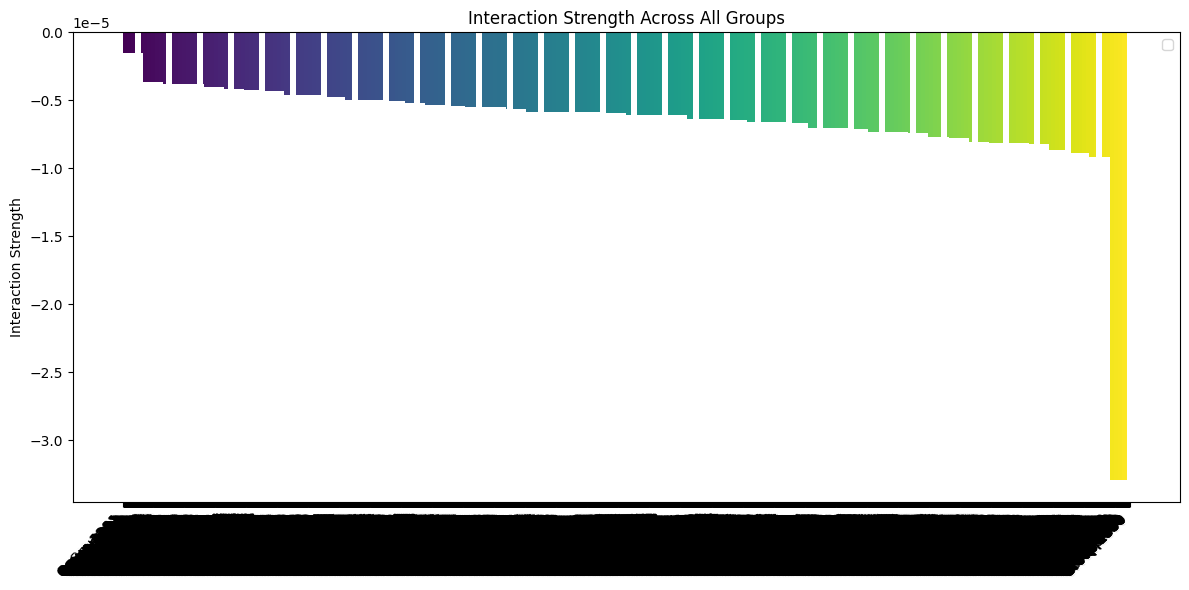

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_interaction_bars(interaction_matrices, group_labels=None, cmap='viridis'):
    """
    Parameters:
    interaction_matrices : List of 2x2 numpy arrays
    group_labels : List of group identifiers (optional)
    cmap : Colormap name (default: 'viridis')
    """
    # Extract absolute off-diagonal values
    interactions = [(mat[0,1]) for mat in interaction_matrices]
    
    # Create group indices if labels not provided
    if group_labels is None:
        group_labels = [f'Group {i+1}' for i in range(len(interactions))]
    
    # Sort by interaction strength
    sort_idx = np.argsort(interactions)[::-1]  # Descending order
    sorted_interactions = [interactions[i] for i in sort_idx]
    sorted_labels = [group_labels[i] for i in sort_idx]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create color map
    colors = cm.get_cmap(cmap)(np.linspace(0, 1, len(interactions)))
    
    # Plot bars
    bars = ax.bar(sorted_labels, sorted_interactions, color=colors)
    
    # # Add horizontal line at median
    # median_val = np.median(sorted_interactions)
    # ax.axhline(median_val, color='red', linestyle='--', 
    #            label=f'Median: {median_val:.2f}')
    
    # Formatting
    ax.set_ylabel('Interaction Strength')
    ax.set_title('Interaction Strength Across All Groups')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    
    return fig, ax

# Example usage:
# interaction_matrices = [...]  # Your list of 2x2 matrices
plot_interaction_bars(interactions)

In [ ]:
ocsmm_exp.check_efficiency(shapley_dict)

AttributeError: 'OCSMMSHAP' object has no attribute 'check_efficiency'

In [ ]:
v_45 = ocsmm_exp.get_value_function_for_N(datasets)[45].item()

Calculating value function for grand coalition v(N)...
v(N) calculation complete.


In [ ]:
v_45

0.013166353106498718